In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np






In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv('/content/drive/My Drive/data/fashion-mnist_test.csv')

In [88]:
data.shape

(10000, 785)

In [0]:
X=data.iloc[:,1:785]

In [0]:
y=data.iloc[:,0]

In [94]:
y

0       0
1       1
2       2
3       2
4       3
5       2
6       8
7       6
8       5
9       0
10      3
11      4
12      4
13      6
14      8
15      5
16      6
17      3
18      6
19      4
20      4
21      4
22      2
23      1
24      5
25      7
26      8
27      4
28      4
29      1
       ..
9970    5
9971    9
9972    6
9973    0
9974    5
9975    0
9976    8
9977    8
9978    7
9979    2
9980    7
9981    4
9982    5
9983    5
9984    5
9985    0
9986    0
9987    6
9988    7
9989    9
9990    7
9991    9
9992    4
9993    8
9994    0
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [95]:
X.shape

(10000, 784)

In [96]:
y.shape

(10000,)

In [0]:
X=X.values

In [0]:
X=X.reshape((10000,28,28,1))

In [99]:
X.shape

(10000, 28, 28, 1)

<function matplotlib.pyplot.show>

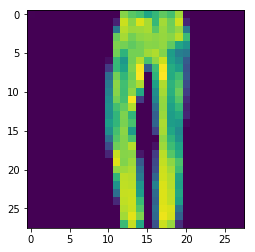

In [34]:
plt.imshow(X[0].reshape((28,28)))
plt.show
plt.imshow(X[1].reshape((28,28)))
plt.show


In [35]:
import keras

Using TensorFlow backend.


In [101]:
y.shape

(10000,)

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten

In [0]:
model=Sequential()

In [102]:
model.add(Convolution2D(32,3,3,input_shape=(28,28,1),activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [103]:
model.add(Convolution2D(64,3,3,activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [105]:
model.add(Convolution2D(32,3,3,activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:
model.add(Flatten())

In [107]:
model.add(Dense(output_dim=128,input_dim=(28,28,1),activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=(28, 28, 1..., activation="relu", units=128)`
  """Entry point for launching an IPython kernel.


In [108]:
model.add(Dense(output_dim=10,activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  """Entry point for launching an IPython kernel.


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from keras import utils


In [0]:
y=utils.to_categorical(y)

In [111]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [112]:
y.shape

(10000, 10)

In [65]:
y=y.values

AttributeError: ignored

In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total para

In [115]:
model.fit(X,y,batch_size=8,epochs=10,validation_split=0.30)

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 5s 672us/step - loss: 0.4444 - acc: 0.8419 - val_loss: 0.4881 - val_acc: 0.8253
Epoch 2/10
7000/7000 [==============================] - 5s 665us/step - loss: 0.3274 - acc: 0.8790 - val_loss: 0.4633 - val_acc: 0.8603
Epoch 3/10
7000/7000 [==============================] - 5s 655us/step - loss: 0.2659 - acc: 0.8993 - val_loss: 0.5658 - val_acc: 0.8353
Epoch 4/10
7000/7000 [==============================] - 5s 661us/step - loss: 0.2401 - acc: 0.9111 - val_loss: 0.5874 - val_acc: 0.8357
Epoch 5/10
7000/7000 [==============================] - 5s 653us/step - loss: 0.2027 - acc: 0.9287 - val_loss: 0.6327 - val_acc: 0.8310
Epoch 6/10
7000/7000 [==============================] - 5s 656us/step - loss: 0.1843 - acc: 0.9309 - val_loss: 0.5837 - val_acc: 0.8493
Epoch 7/10
7000/7000 [==============================] - 5s 659us/step - loss: 0.1541 - acc: 0.9443 - val_loss: 0.6284 - val_acc: 0.8473


In [0]:
test=pd.read_csv('/content/drive/My Drive/data/fashion-mnist_test.csv')

In [118]:
test=test.values


ValueError: ignored

In [0]:
test_x=test[:,1:785]

In [0]:
test_y=test[:,0]

In [0]:
test_x=test_x.reshape((10000,28,28,1))

In [0]:
predicted=model.predict_classes(test_x)

In [0]:
test_y=utils.to_categorical(test_y)

In [134]:
model.evaluate(test_x,test_y)

10000/10000 [==============================] - 1s 67us/step


[0.2853310076922178, 0.9361]

In [149]:
predicted

array([0, 1, 2, ..., 8, 8, 3])